# exploratory data analysis - bidding zone NO1 and neighboring zones for the year of 2022

In [1]:
# importing dependencies to aggregate dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization


**About:**
Hourly electricity prices and external factors for bidding zone NO1 (Norway Østlandet) and neightbouring zones (NO2, NO3, NO5 and SE3).
**Source of the datasets data::** https://transparency.entsoe.eu/dashboard/show

**Attribute information:**

**Target feature:** 	**Day-ahead Price** Spot (day-ahead) market prices in the currency Euro per MWh (megawatt-hour).
1.	**Start MTU (UTC):** Start datetime of the interval for the measured values
2.	**Start MTU (UTC):** End time of the interval for the measured values
3.	**Actual Total Load:** The power consumption in each zone per MW (megawatt)
4.	**Biomass:** Energy production in MW  from Biomass.
5.	**Fossil Gas:** Energy production in MW  from Fossil Gas.
6.	**Hydro Run-of-river and poundage:** Energy production in MW  from Hydro Run-of-river and poundage.
7.	**Hydro Water Reservoir:** Energy production in MW  from Hydro Run-of-river and poundage.
8.	**Wind Onshore:** Energy production in MW  from onshore wind.
9.	**Hydro Pumped Storage Aggregated:** Energy production in MW  from Hydro Pumped Storage Aggregated.
10.	**Hydro Run-of-river and poundage:** Energy production in MW  from Hydro Run-of-river and poundage
11.	**Other renewable:** Energy production in MW  from Other renewable.
12.	**Marine:** Energy production in MW  from Marine.
13.	**Solar:** Energy production in MW  from Solar.
14.	**CBF BZN|x > BZN|y [MWh]:**  Cross-border physical flow in MWH (mega watt hour), zone x is export zone and zone y is import zone.
15.	**Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh]:** Stored Energy Value in Water Reservoirs and Hydro Storage Plants measured in MwH (mega watt hour)

In [2]:
# reding in the dataset to a dataframe
no1 = pd.read_csv('../datasets/no1_aggregated/no1_2020_to_2022_aggregated.csv')

# printing out he 5 first rows of the dataset
no1.head()

,start MTU (UTC),end MTU (UTC),Day-ahead Price [EUR/MWh] BZN|NO1,Day-ahead Price [EUR/MWh] BZN|NO2,Day-ahead Price [EUR/MWh] BZN|NO3,Day-ahead Price [EUR/MWh] BZN|NO5,Day-ahead Price [EUR/MWh] BZN|SE3,Actual Total Load [MW] - BZN|NO1,Actual Total Load [MW] - BZN|NO2,Actual Total Load [MW] - BZN|NO3,...,CBF BZN|NO1 > BZN|NO3 [MW],CBF BZN|NO5 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO5 [MW],CBF BZN|SE3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|SE3 [MW],Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO1,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO2,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO3,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO5,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|SE3
0,2020-01-01 00:00:00,2020-01-01 01:00:00,31.77,31.77,28.45,31.77,28.45,4333.0,4139.0,3016.0,...,0.0,1449.0,0.0,391,0,3.962493e+06,2.438936e+07,5.608103e+06,1.119240e+07,2.209379e+06
1,2020-01-01 01:00:00,2020-01-01 02:00:00,31.57,31.57,27.90,31.57,27.90,4250.0,4114.0,2945.0,...,0.0,1283.0,0.0,348,0,3.961448e+06,2.439155e+07,5.608290e+06,1.119184e+07,2.209164e+06
2,2020-01-01 02:00:00,2020-01-01 03:00:00,31.28,31.28,27.52,31.28,27.52,4167.0,4030.0,3032.0,...,6.0,962.0,0.0,500,0,3.960404e+06,2.439372e+07,5.608466e+06,1.119128e+07,2.208948e+06
3,2020-01-01 03:00:00,2020-01-01 04:00:00,30.72,30.72,27.54,30.72,27.54,4145.0,4032.0,2988.0,...,6.0,767.0,0.0,610,0,3.959359e+06,2.439589e+07,5.608632e+06,1.119071e+07,2.208733e+06
4,2020-01-01 04:00:00,2020-01-01 05:00:00,30.27,30.27,26.55,30.27,26.55,4222.0,4032.0,2848.0,...,22.0,642.0,0.0,909,0,3.958314e+06,2.439805e+07,5.608788e+06,1.119013e+07,2.208518e+06


In [3]:
# printing out the shape of the dataset
no1.shape

(26304, 56)

In [4]:
# printing out info about dataset
no1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 56 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   start MTU (UTC)                                                                26304 non-null  object 
 1   end MTU (UTC)                                                                  26304 non-null  object 
 2   Day-ahead Price [EUR/MWh] BZN|NO1                                              26304 non-null  float64
 3   Day-ahead Price [EUR/MWh] BZN|NO2                                              26304 non-null  float64
 4   Day-ahead Price [EUR/MWh] BZN|NO3                                              26304 non-null  float64
 5   Day-ahead Price [EUR/MWh] BZN|NO5                                              26304 non-null  float64
 6   Day-ahead Price [EUR/M

We Can see that the datetime columns are of the data type object, so we ned to convert it into the data type datetime. The remaining values seems to have an appropriate data type. We also notice that the value onthe 'non-null count' of allot of the columns are less than the size of the dataset (26304), and we therefore know that allot of the features have missing values. We should therefore investigate which values are misssing, and handle the missing values accordingly.

In [5]:
# converting datetime columns to data type datetime
no1['start MTU (UTC)'] = pd.to_datetime(no1['start MTU (UTC)'])
no1['start MTU (UTC)'] = pd.to_datetime(no1['start MTU (UTC)'])

## Handling missing values

In [6]:
# printing out summary of missing values in the dataset:
no1.isna().sum()

start MTU (UTC)                                                                   0
end MTU (UTC)                                                                     0
Day-ahead Price [EUR/MWh] BZN|NO1                                                 0
Day-ahead Price [EUR/MWh] BZN|NO2                                                 0
Day-ahead Price [EUR/MWh] BZN|NO3                                                 0
Day-ahead Price [EUR/MWh] BZN|NO5                                                 0
Day-ahead Price [EUR/MWh] BZN|SE3                                                 0
Actual Total Load [MW] - BZN|NO1                                                  1
Actual Total Load [MW] - BZN|NO2                                                  1
Actual Total Load [MW] - BZN|NO3                                                  1
Actual Total Load [MW] - BZN|NO5                                                  1
Actual Total Load [MW] - BZN|SE3                                            

We can now see which features are missing values, and how many values are missing from each feature. We will handle the missing values feature by feature starting with 'Actual Total Load [MW]'

### Handling missing values for load columns
We can start by checking which rows are missing values for load features.

In [7]:
# creating a list of load column names
load_column_names = [col_name for col_name in no1.columns if 'Actual Total Load' in col_name]
load_column_names.insert(0, 'start MTU (UTC)')
load_column_names.insert(1, 'end MTU (UTC)')
                    

# checking which row is missing values for column 'Actual Total Load [MW] - BZN|NO1'
no1[no1['Actual Total Load [MW] - BZN|NO1'].isnull()].loc[:, load_column_names]

,start MTU (UTC),end MTU (UTC),Actual Total Load [MW] - BZN|NO1,Actual Total Load [MW] - BZN|NO2,Actual Total Load [MW] - BZN|NO3,Actual Total Load [MW] - BZN|NO5,Actual Total Load [MW] - BZN|SE3
16057,2021-10-31 01:00:00,2021-10-31 02:00:00,NaN,NaN,NaN,NaN,7786


It seems like none of the Norwegian bidding zones have recorded data for the time interval 31.10.2021 01:00 - 31.10.2021 02:00.

Since it is a dingle row with a missing vlaue, we can simply impute the missing value through interpolation which uses the neighbouring values to generate an the missing intermediary value. We choose to use spline interpolation which estimates the missing values while focusing on minimizing the curvature  of the value graph. 

In [8]:
# performing splilne inerpolation to fill missing values in load columns
no1['Actual Total Load [MW] - BZN|NO1'] = no1['Actual Total Load [MW] - BZN|NO1'].interpolate(option='spline')
no1['Actual Total Load [MW] - BZN|NO2'] = no1['Actual Total Load [MW] - BZN|NO2'].interpolate(option='spline')
no1['Actual Total Load [MW] - BZN|NO3'] = no1['Actual Total Load [MW] - BZN|NO3'].interpolate(option='spline')
no1['Actual Total Load [MW] - BZN|NO5'] = no1['Actual Total Load [MW] - BZN|NO5'].interpolate(option='spline')
no1['Actual Total Load [MW] - BZN|SE3'] = no1['Actual Total Load [MW] - BZN|SE3'].interpolate(option='spline')

# checking if all the missing values in load columns have been filled:
no1.loc[:, load_column_names].isna().sum()

start MTU (UTC)                     0
end MTU (UTC)                       0
Actual Total Load [MW] - BZN|NO1    0
Actual Total Load [MW] - BZN|NO2    0
Actual Total Load [MW] - BZN|NO3    0
Actual Total Load [MW] - BZN|NO5    0
Actual Total Load [MW] - BZN|SE3    0
dtype: int64

We can see that none of the load columns have any missing values.

### Handling missing values for Hydro Run-of-river and poundage columns


In [10]:
# creating a list of Hydro Run-of-river and poundage  column names
hydro_run_of_column_names = [col_name for col_name in no1.columns if 'Hydro Run-of-river and poundage' in col_name]
hydro_run_of_column_names.insert(0, 'start MTU (UTC)')
hydro_run_of_column_names.insert(1, 'end MTU (UTC)')
                    

# checking which row is missing values for column 'Actual Total Load [MW] - BZN|NO1'
no1[no1['Hydro Run-of-river and poundage - BZN|NO1'].isnull()].loc[:, hydro_run_of_column_names]

,start MTU (UTC),end MTU (UTC),Hydro Run-of-river and poundage - BZN|NO1,Hydro Run-of-river and poundage - BZN|NO2,Hydro Run-of-river and poundage - BZN|NO3,Hydro Run-of-river and poundage - BZN|NO5
4959,2020-07-25 15:00:00,2020-07-25 16:00:00,NaN,NaN,NaN,NaN
4960,2020-07-25 16:00:00,2020-07-25 17:00:00,NaN,NaN,NaN,NaN
4961,2020-07-25 17:00:00,2020-07-25 18:00:00,NaN,NaN,NaN,NaN
4962,2020-07-25 18:00:00,2020-07-25 19:00:00,NaN,NaN,NaN,NaN
4963,2020-07-25 19:00:00,2020-07-25 20:00:00,NaN,NaN,NaN,NaN


We can se that the missing values for hydro run of span for a continious interval of 5 hours. Because there are consecutive datapoints missing, we cannot impute the missing values by generating a single and replace every missing value with that value. The reason for this is that these summary statistics do not generate values which accurately reflect the distribution of the underlying data, and can introduce undue bias into the dataset. We therefore opt to use interpolation which generates fill values based on the neighbouring values. To pick an appropriate intorerpolation type we check the graph for the data, and see if the datapoints are more linear in nature (straig lines) or if they seem polynomeal (have a curve):

<AxesSubplot:xlabel='hour', ylabel='hydro run of river and porage'>

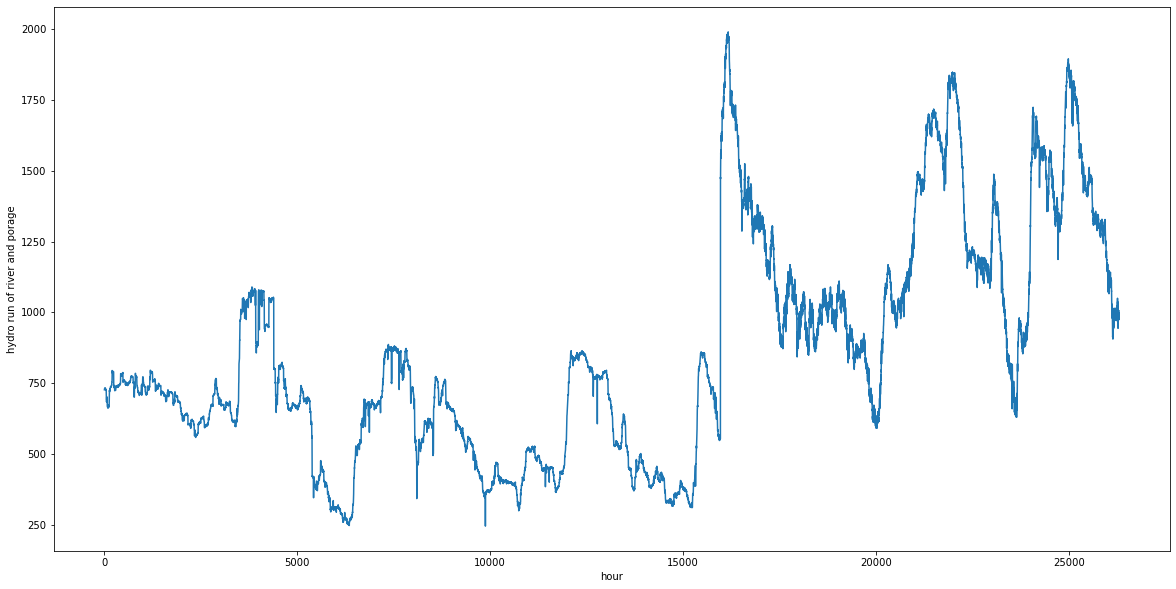

In [25]:
# plotting hydro run of river and porage for zone no1

no1['Hydro Run-of-river and poundage - BZN|NO1'].plot(xlabel='hour', ylabel='hydro run of river and porage', figsize=(20, 10))

We can see that the graph is quite jagged, so a linear interpolation is a reasonable option.

In [27]:
# performing splilne inerpolation to fill missing values in hydro run of columns
no1['Hydro Run-of-river and poundage - BZN|NO1'] = no1['Hydro Run-of-river and poundage - BZN|NO1'].interpolate(option='linear')
no1['Hydro Run-of-river and poundage - BZN|NO2'] = no1['Hydro Run-of-river and poundage - BZN|NO2'].interpolate(option='linear')
no1['Hydro Run-of-river and poundage - BZN|NO3'] = no1['Hydro Run-of-river and poundage - BZN|NO3'].interpolate(option='linear')
no1['Hydro Run-of-river and poundage - BZN|NO5'] = no1['Hydro Run-of-river and poundage - BZN|NO5'].interpolate(option='linear')
# no1['Hydro Run-of-river and poundage - BZN|SE3'] = no1['Hydro Run-of-river and poundage - BZN|SE3'].interpolate(option='linear')
# :TODO remove commented out line if data for SE3 does not exist

# checking if all the missing values in hydro run of columns have been filled:
no1.loc[:, hydro_run_of_column_names].isna().sum()

start MTU (UTC)                              0
end MTU (UTC)                                0
Hydro Run-of-river and poundage - BZN|NO1    0
Hydro Run-of-river and poundage - BZN|NO2    0
Hydro Run-of-river and poundage - BZN|NO3    0
Hydro Run-of-river and poundage - BZN|NO5    0
dtype: int64

We can see that none of the 'hydro run of' columns have any missing values.